<a href="https://colab.research.google.com/github/paola-89/Numerico/blob/main/Ejercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tarea 1**
*Integrantes:*


*   Castillo Saldivar Paola
*   Islas Castro Diego Armando
*   Maldonado Cruz Josué Iván    



# **Ejercicio 1.1**


In [ ]:
import numpy as np

import time



# Multiplicación por bloques



# Para hacer la multiplicación de matrices por bloques debemos definir una función

# que divida las matrices

def dividir_matriz_en_bloques(M, tamano_bloque):

    bloques = []

    n = len(M)

    for i in range(0, n, tamano_bloque):

        fila_bloques = []

        for j in range(0, n, tamano_bloque):

            bloque = [fila[j:j+tamano_bloque] for fila in M[i:i+tamano_bloque]]

            fila_bloques.append(bloque)

        bloques.append(fila_bloques)

    return bloques



def multiplicacion_bloques(A, B, tamano_bloque):

    n = len(A)

    C = np.zeros((n, n))



    bloques_A = dividir_matriz_en_bloques(A, tamano_bloque)

    bloques_B = dividir_matriz_en_bloques(B, tamano_bloque)



    num_bloques = len(bloques_A)



    for i in range(num_bloques):

        for j in range(num_bloques):

            for k in range(num_bloques):

                for bi in range(tamano_bloque):

                    for bj in range(tamano_bloque):

                        suma = 0

                        for bk in range(tamano_bloque):

                            suma += bloques_A[i][k][bi][bk] * bloques_B[k][j][bk][bj]

                        C[i*tamano_bloque + bi][j*tamano_bloque + bj] += suma



    return C



# Multiplicación tradicional

def MultMat(Mat1, Mat2):

    """Multiplica dos matrices usando el algoritmo tradicional."""

    Mat3 = np.zeros((Mat1.shape[0], Mat2.shape[1]))

    for row in range(Mat1.shape[0]):

        for col in range(Mat2.shape[1]):

            for aux in range(Mat2.shape[0]):

                Mat3[row, col] += Mat1[row, aux] * Mat2[aux, col]

    return Mat3



# Comparar tiempos de ejecución para diferentes tamaños de matrices

def comparar_multiplicaciones(n, block_size):

    # Generando matrices aleatorias

    A = np.random.rand(n, n)

    B = np.random.rand(n, n)



    # Multiplicación tradicional y medición de tiempo

    start = time.time()

    C_normal = MultMat(A, B)

    time_normal = time.time() - start



    # Multiplicación por bloques y medición de tiempo

    start = time.time()

    C_blocks = multiplicacion_bloques(A, B, block_size)

    time_blocks = time.time() - start



    # Comparación de tiempos

    print(f"Tamaño de la matriz: {n}x{n}")

    print(f"Tiempo multiplicación normal: {time_normal:.6f} s")

    print(f"Tiempo multiplicación por bloques: {time_blocks:.6f} s")

    print(f"Mejor tiempo: {'Bloques' if time_blocks < time_normal else 'Normal'}\n")



# Ejecutar comparaciones para tamaños de matrices de 10 a 100

block_size = 10  # Tamaño de bloque

for n in range(10, 101, 10):

    comparar_multiplicaciones(n, block_size)



Tamaño de la matriz: 10x10
Tiempo multiplicación normal: 0.001189 s
Tiempo multiplicación por bloques: 0.000857 s
Mejor tiempo: Bloques

Tamaño de la matriz: 20x20
Tiempo multiplicación normal: 0.019089 s
Tiempo multiplicación por bloques: 0.015402 s
Mejor tiempo: Bloques

Tamaño de la matriz: 30x30
Tiempo multiplicación normal: 0.066626 s
Tiempo multiplicación por bloques: 0.049547 s
Mejor tiempo: Bloques

Tamaño de la matriz: 40x40
Tiempo multiplicación normal: 0.179883 s
Tiempo multiplicación por bloques: 0.116554 s
Mejor tiempo: Bloques

Tamaño de la matriz: 50x50
Tiempo multiplicación normal: 0.267662 s
Tiempo multiplicación por bloques: 0.217959 s
Mejor tiempo: Bloques

Tamaño de la matriz: 60x60
Tiempo multiplicación normal: 0.561069 s
Tiempo multiplicación por bloques: 0.337688 s
Mejor tiempo: Bloques

Tamaño de la matriz: 70x70
Tiempo multiplicación normal: 0.674347 s
Tiempo multiplicación por bloques: 0.563966 s
Mejor tiempo: Bloques

Tamaño de la matriz: 80x80
Tiempo multipl

# **Ejercicio 1.2**

In [ ]:
def suma_bloques(A, B, block_size):

    n = len(A)

    C = [[0 for _ in range(n)] for _ in range(n)]  # Inicializa la matriz C



    for i in range(0, n, block_size):

        for j in range(0, n, block_size):

            for bi in range(i, min(i + block_size, n)):

                for bj in range(j, min(j + block_size, n)):

                    C[bi][bj] = A[bi][bj] + B[bi][bj]

    return C



# Ejemplo de matrices 4x4

A = [

    [1, 2, 3, 4],

    [5, 6, 7, 8],

    [9, 10, 11, 12],

    [13, 14, 15, 16]

]



B = [

    [16, 15, 14, 13],

    [12, 11, 10, 9],

    [8, 7, 6, 5],

    [4, 3, 2, 1]

]



# Tamaño del bloque

block_size = 2



# Sumar las matrices

C = suma_bloques(A, B, block_size)



# Imprimir la matriz resultante

for fila in C:

    print(fila)

[17, 17, 17, 17]
[17, 17, 17, 17]
[17, 17, 17, 17]
[17, 17, 17, 17]


# **Ejercicio 1.3**

In [ ]:
def producto_punto_bloques(v1, v2, block_size):

  n = len(v1)

  resultado = 0

  for i in range(0, n, block_size):

    suma_bloques = 0

    for j in range(i, min(i + block_size, n)):

      suma_bloques += v1[j] * v2[j]

    resultado += suma_bloques

  return resultado



v1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

v2 = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

block_size = 3



resultado = producto_punto_bloques(v1, v2, block_size)

print(resultado)



220


# **Ejercicio 1.4**

In [ ]:
def transpuesta_conjugada(Mat):

  filas = len(matriz)

  columnas = len(matriz[0])

  transpuesta = [[0 for _ in range(filas)] for _ in range(columnas)]

  for i in range (filas):

    for j in range(columnas):

      transpuesta[j][i] = matriz[i][j].conjugate()

  return transpuesta



matriz = [[2 + 1j, 3 - 2j], [1 - 1j, 4 + 0j]]

resultado = transpuesta_conjugada(matriz)

print(resultado)





[[(2-1j), (1+1j)], [(3+2j), (4-0j)]]


# **Ejercicio 1.5**

In [ ]:
def multiplicar_matrices(A, B):

    """

    Multiplica dos matrices A y B de tamaño 50x50.



    Parámetros:

    A, B: Listas de listas que representan las matrices de 50x50.



    Retorna:

    Una nueva matriz que es el resultado de A * B.

    """

    tamaño = len(A)

    # Inicializar la matriz resultado con ceros

    resultado = [[0 for _ in range(tamaño)] for _ in range(tamaño)]



    # Realizar la multiplicación de matrices

    for i in range(tamaño):

        for j in range(tamaño):

            suma = 0

            for k in range(tamaño):

                suma += A[i][k] * B[k][j]

            resultado[i][j] = suma



    return resultado









def potencia_matriz(A, n):

    """

    Calcula la potencia n-ésima de una matriz A de tamaño 50x50.



    Parámetros:

    A: Lista de listas que representa la matriz de 50x50.

    n: Entero que indica la potencia a la que se elevará la matriz.



    Retorna:

    La matriz A elevada a la potencia n.

    """

    # Inicializar la matriz resultado como la matriz identidad

    tamaño = len(A)

    resultado = [[1 if i == j else 0 for j in range(tamaño)] for i in range(tamaño)]



    # Multiplicar la matriz por sí misma n veces

    for _ in range(n):

        resultado = multiplicar_matrices(resultado, A)



    return resultado



# Definir una matriz de 50x50 (por simplicidad, se utiliza una matriz con valores arbitrarios)

import random



tamaño = 50

matriz = [[random.random() for _ in range(tamaño)] for _ in range(tamaño)]



# Calcular la matriz elevada al cubo

n = 3

matriz_potencia = potencia_matriz(matriz, n)



# Mostrar algunos elementos de la matriz resultante

for fila in matriz_potencia[:5]: # Mostrar solo las primeras 5 filas por brevedad

    print(fila[:5]) # Mostrar solo las primeras 5 columnas por brevedad



[264.15798148400364, 273.60903049654746, 251.61724013496277, 264.12534108447693, 266.04949100425347]
[283.8776882326529, 290.81526597612793, 263.3785414414059, 280.9371492579776, 280.46069727215723]
[289.548481454214, 301.470411963869, 272.53091557185917, 288.9317040555778, 288.097925261967]
[262.06138207044717, 271.1833052709158, 247.9957979222956, 259.72683884587974, 260.8175227121712]
[315.92615780492144, 326.92616139710344, 295.18499386908627, 315.190494349249, 316.612995776557]


# **Ejercicio 1.6**

In [ ]:
def producto_cruz(a, b):
    """
    Calcula el producto cruz de dos vectores en R^3.

    Parámetros:
    a (list): Vector de la forma [a_x, a_y, a_z]
    b (list): Vector de la forma [b_x, b_y, b_z]

    Retorna:
    list: Vector resultante del producto cruz [c_x, c_y, c_z]
    """
    c_x = a[1] * b[2] - a[2] * b[1]
    c_y = a[2] * b[0] - a[0] * b[2]
    c_z = a[0] * b[1] - a[1] * b[0]
    return [c_x, c_y, c_z]

# Ejemplo de uso:
vector_a = [1, 2, 3]
vector_b = [4, 5, 6]
resultado = producto_cruz(vector_a, vector_b)
print(f"El producto cruz de {vector_a} y {vector_b} es {resultado}")

El producto cruz de [1, 2, 3] y [4, 5, 6] es [-3, 6, -3]


# **Ejercicio 1.7**

## Rotación de un vector en 2D

**Paso 1: Vector original y ángulo de rotación**

El vector original es:

$$
v = \begin{bmatrix} 1 \\ 0 \end{bmatrix}
$$

y el ángulo de rotación es:


$$45^\circ$$

---

**Paso 2: Conversión a radianes**

Para realizar el cálculo, primero convertimos el ángulo de 45° a radianes:

$$
45^\circ = \frac{45 \pi}{180} = 0.7854 \text{ rad}
$$

---

**Paso 3: Cálculo de las componentes trigonométricas**

Calculamos:

$$
\cos(0.7854) \approx 0.7071, \quad \sin(0.7854) \approx 0.7071
$$

---

**Paso 4: Matriz de rotación**

La matriz de rotación para un ángulo $\theta = 0.7854$ rad es:

$$
R(0.7854) = \begin{bmatrix} 0.7071 & -0.7071 \\ 0.7071 & 0.7071 \end{bmatrix}
$$

---

**Paso 5: Multiplicación matricial**

Multiplicamos la matriz de rotación por el vector:

$$
R(0.7854) \cdot v =
\begin{bmatrix} 0.7071 & -0.7071 \\ 0.7071 & 0.7071 \end{bmatrix}
\begin{bmatrix} 1 \\ 0 \end{bmatrix}
=
\begin{bmatrix} 0.7071 \\ 0.7071 \end{bmatrix}
$$

---

**Interpretación del resultado**

El vector rotado es:

$$
v' = \begin{bmatrix} 0.7071 \\ 0.7071 \end{bmatrix}
$$

Esto indica que el vector original $v = (1,0)$ se ha rotado 45° en sentido antihorario, situándose en la dirección $(0.7071, 0.7071)$.


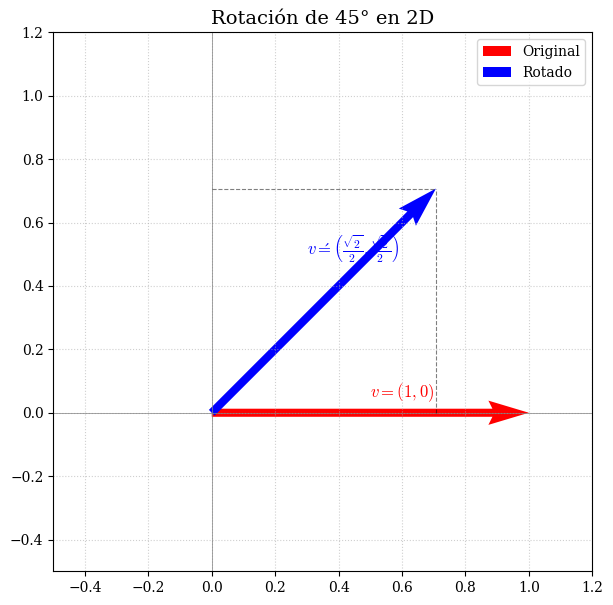

In [ ]:
from IPython.display import display, Math, Latex
# ----------------------------------------------
# Paso 6: ver la gráfiquini
# ----------------------------------------------
plt.figure(figsize=(7, 7))
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)

# Vectores
plt.quiver(0, 0, 1, 0, angles='xy', scale_units='xy', scale=1, color='red', width=0.015, label='Original')
plt.quiver(0, 0, 0.7071, 0.7071, angles='xy', scale_units='xy', scale=1, color='blue', width=0.015, label='Rotado')

# Líneas de componentes
plt.plot([0.7071, 0.7071], [0, 0.7071], 'k--', lw=0.8, alpha=0.5)
plt.plot([0, 0.7071], [0.7071, 0.7071], 'k--', lw=0.8, alpha=0.5)

# Añadir etiquetas
plt.text(0.5, 0.05, r'$v = (1, 0)$', color='red', fontsize=12)
plt.text(0.3, 0.5, r'$v\' = \left(\frac{\sqrt{2}}{2}, \frac{\sqrt{2}}{2}\right)$', color='blue', fontsize=12)

# Configuración final
plt.title("Rotación de 45° en 2D", fontsize=14)
plt.xlim(-0.5, 1.2)
plt.ylim(-0.5, 1.2)
plt.grid(linestyle='dotted', alpha=0.6)
plt.legend(loc='upper right')
plt.gca().set_aspect('equal')
plt.show()

In [ ]:
import math

def rotar_vector(vector, angulo_grados):
    """
    Rota un vector bidimensional por un ángulo dado en grados.

    Parámetros:
    vector (tuple): Vector en la forma (x, y).
    angulo_grados (float): Ángulo de rotación en grados.

    Retorna:
    tuple: Nuevo vector rotado (x', y').
    """
    angulo_radianes = math.radians(angulo_grados)
    cos_theta = math.cos(angulo_radianes)
    sin_theta = math.sin(angulo_radianes)

    x, y = vector
    x_nuevo = x * cos_theta - y * sin_theta
    y_nuevo = x * sin_theta + y * cos_theta

    return (x_nuevo, y_nuevo)

# Ejemplo de uso:
vector_original = (1, 0)
angulo_rotacion = 45 # grados
vector_rotado = rotar_vector(vector_original, angulo_rotacion)
print(f"Vector original: {vector_original}")
print(f"Vector rotado por {angulo_rotacion}°: {vector_rotado}")

Vector original: (1, 0)
Vector rotado por 45°: (0.7071067811865476, 0.7071067811865475)


#**Ejercicio 1.8**

In [ ]:
import math

def rotar_vector_3d(vector, angulo_grados, eje):
    """
    Rota un vector tridimensional alrededor de uno de los ejes principales.

    Parámetros:
    vector (tuple): Vector en la forma (x, y, z).
    angulo_grados (float): Ángulo de rotación en grados.
    eje (str): Eje de rotación ('x', 'y' o 'z').

    Retorna:
    tuple: Nuevo vector rotado (x', y', z').
    """
    angulo_radianes = math.radians(angulo_grados)
    cos_theta = math.cos(angulo_radianes)
    sin_theta = math.sin(angulo_radianes)

    x, y, z = vector

    if eje == 'x':
        y_nuevo = y * cos_theta - z * sin_theta
        z_nuevo = y * sin_theta + z * cos_theta
        x_nuevo = x
    elif eje == 'y':
        x_nuevo = x * cos_theta + z * sin_theta
        z_nuevo = -x * sin_theta + z * cos_theta
        y_nuevo = y
    elif eje == 'z':
        x_nuevo = x * cos_theta - y * sin_theta
        y_nuevo = x * sin_theta + y * cos_theta
        z_nuevo = z
    else:
        raise ValueError("El eje debe ser 'x', 'y' o 'z'.")

    return (x_nuevo, y_nuevo, z_nuevo)

# Ejemplo de uso:
vector_original = (1, 0, 0)
angulo_rotacion = 90 # grados
eje_rotacion = 'z'
vector_rotado = rotar_vector_3d(vector_original, angulo_rotacion, eje_rotacion)
print(f"Vector original: {vector_original}")
print(f"Vector rotado por {angulo_rotacion}° alrededor del eje {eje_rotacion}: {vector_rotado}")

Vector original: (1, 0, 0)
Vector rotado por 90° alrededor del eje z: (6.123233995736766e-17, 1.0, 0)


# **Ejercicio 1.9**

In [ ]:
def norma1(matriz):
    """
    Calcula la norma 1 de una matriz.

    La norma 1 de una matriz es el máximo de las sumas absolutas de sus columnas.

    Parámetros:
    matriz (list of list): Matriz de entrada.

    Retorna:
    float: Valor de la norma 1.
    """
    m = len(matriz)
    n = len(matriz[0])
    c = np.zeros_like(matriz[0])

    for j in range(n):
        for i in range(m):
            c[j] += abs(matriz[i][j])

    return max(c)


# Ejemplo de uso
A = [[2, 3, -4],
     [0, -4, 2]]

print("La norma 1 de la matriz A:\n", A)
print("Es:", norma1(A))

La norma 1 de la matriz A:
 [[2, 3, -4], [0, -4, 2]]
Es: 7


# **EJERCICIO 1.10**

In [ ]:
def norma_infinito(matriz):
    return max(sum(abs(matriz[i][j]) for j in range(len(matriz[0]))) for i in range(len(matriz)))

# Ejemplo de uso
A = [[3, -2, 5], [1, -4, 2], [-2, 3, -1]]
print("Norma infinito de A:", norma_infinito(A))

Norma infinito de A: 10
